In [1]:
import pandas as pd


path = '../data/observations-580259.csv'

df = pd.read_csv(path)
df

,id,uuid,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,...,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,9389,fdddd032-d47c-4f41-a98e-3471e0f0be6a,2009-08-19,2009-08-19,NaN,Pacific Time (US & Canada),477,loarie,Scott Loarie,2010-12-19 19:47:24 UTC,...,Rio de Janeiro,Rio de Janeiro,Brazil,Rio de Janeiro,Rio de Janeiro,Common Marmoset,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
1,1352476,d997a140-9672-4580-a71f-6236a0603534,2004-08-10,2004-08-10,NaN,Brasilia,3042,duarte,Duarte Frade,2015-03-31 11:22:30 UTC,...,Rio de Janeiro,Rio de Janeiro,Brazil,Rio de Janeiro,Rio de Janeiro,Sagui-de-Tufos-Brancos,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
2,1451263,eedd0bd3-f11c-46ac-9dce-32c9955cff36,2012-04-30 13:14:59,2012-04-30,2012-04-30 16:14:59 UTC,Brasilia,61934,sandrovonmatter,Sandro Von Matter,2015-05-03 21:15:53 UTC,...,Rio de Janeiro,Rio de Janeiro,Brazil,Rio de Janeiro,Rio de Janeiro,callithrix jacchus,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
3,1451805,38772c55-7d12-437a-9f1e-560096665db0,2014-03-18 11:40:53,2014-03-18,2014-03-18 14:40:53 UTC,Brasilia,61934,sandrovonmatter,Sandro Von Matter,2015-05-03 23:06:03 UTC,...,Itu,São Paulo,Brazil,São Paulo,Itu,Callithrix jacchus,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
4,2653006,7125d1c3-0535-4718-abe7-3c776c854117,2012-07-22 09:23:41,2012-07-22,2012-07-22 12:23:41 UTC,Brasilia,99495,onildo_marini,Onildo João Marini Filho,2016-02-07 10:37:04 UTC,...,Rio de Janeiro,Rio de Janeiro,Brazil,Rio de Janeiro,Rio de Janeiro,Sagui-de-tufos-brancos,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,283009202,a565ccf3-a7b2-406b-b8cc-95384b0decf9,2025/04/05 12:31 PM,2025-04-05,2025-04-05 15:31:00 UTC,Brasilia,800658,mangoverde,William Hull,2025-05-21 23:15:32 UTC,...,Cachoeiras de Macacu,Rio de Janeiro,Brazil,Rio de Janeiro,Cachoeiras de Macacu,Common Marmoset,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
1371,283009204,635cc386-49c1-4e39-967a-bc8c99dd3084,2025/04/05 12:33 PM,2025-04-05,2025-04-05 15:33:00 UTC,Brasilia,800658,mangoverde,William Hull,2025-05-21 23:15:32 UTC,...,Cachoeiras de Macacu,Rio de Janeiro,Brazil,Rio de Janeiro,Cachoeiras de Macacu,Common Marmoset,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
1372,283662531,59261d31-4271-44d9-95fb-c38865382138,2025/05/23 12:49,2025-05-23,2025-05-23 15:49:00 UTC,Brasilia,2726320,alexandremedeiros,Alexandre da Silva Medeiros,2025-05-24 16:06:11 UTC,...,Iperó,São Paulo,Brazil,São Paulo,Iperó,Sagui-de-tufos-brancos,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
1373,284435123,18e3bd73-e27c-4023-9193-23ad91f1dc6b,2024-12-31 08:42:25,2024-12-31,2024-12-31 11:42:25 UTC,Brasilia,9361630,viajocaminhando,Joanna Pimentel - ViaJô Caminhando,2025-05-27 01:17:43 UTC,...,Cachoeiras de Macacu,Rio de Janeiro,Brazil,Rio de Janeiro,Cachoeiras de Macacu,Sagui-de-tufos-brancos,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373


In [ ]:
df['observed_on'] = pd.to_datetime(df['observed_on'])

In [6]:
df['year'] = df['observed_on'].dt.year
df['month'] = df['observed_on'].dt.month
df['day'] = df['observed_on'].dt.day

In [16]:
number_of_observations_series = df.groupby('observed_on').size()
number_of_observations_series

observed_on
1996-08-15    1
1999-06-21    1
2000-07-15    2
2001-04-19    1
2003-11-18    1
             ..
2025-05-10    1
2025-05-12    1
2025-05-16    1
2025-05-20    1
2025-05-23    1
Length: 1008, dtype: int64

In [21]:
number_of_distinct_users_per_day = df.groupby('observed_on')['user_id'].nunique()
number_of_distinct_users_per_day

observed_on
1996-08-15    1
1999-06-21    1
2000-07-15    1
2001-04-19    1
2003-11-18    1
             ..
2025-05-10    1
2025-05-12    1
2025-05-16    1
2025-05-20    1
2025-05-23    1
Name: user_id, Length: 1008, dtype: int64

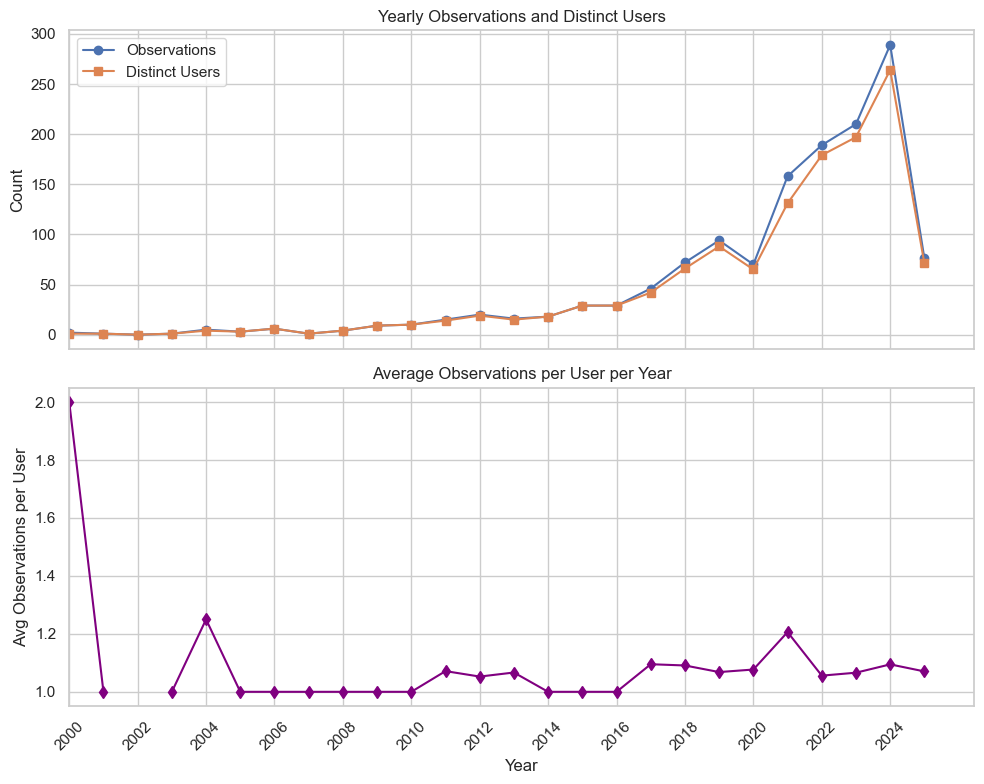

In [25]:
import matplotlib.pyplot as plt

# Resample to yearly sums
obs_per_year = number_of_observations_series.resample('YE').sum()
users_per_year = number_of_distinct_users_per_day.resample('YE').sum()
ratio_per_year = obs_per_year / users_per_year

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot total observations and users per year
axs[0].plot(obs_per_year.index.year, obs_per_year.values, marker='o', label='Observations')
axs[0].plot(users_per_year.index.year, users_per_year.values, marker='s', label='Distinct Users')
axs[0].set_ylabel('Count')
axs[0].set_title('Yearly Observations and Distinct Users')
axs[0].legend()
axs[0].grid(True)

# Plot ratio
axs[1].plot(ratio_per_year.index.year, ratio_per_year.values, marker='d', color='purple')
axs[1].set_ylabel('Avg Observations per User')
axs[1].set_xlabel('Year')
axs[1].set_title('Average Observations per User per Year')
axs[1].grid(True)

# Adjust xlim to start just after 2000
axs[1].set_xlim(left=2000)
axs[1].set_xticks(range(2000, ratio_per_year.index.year.max() + 1, 2))
axs[1].set_xticklabels(range(2000, ratio_per_year.index.year.max() + 1, 2), rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Quero gerar a série do número de usuários nesse dia que não tinham feito observações em nenhum dia anterior.
# Ou seja, o número de usuários que fizeram a primeira observação nesse dia.
first_observations_per_day = df.groupby('observed_on')['user_id'].apply(lambda x: x[x.isin(x.drop_duplicates(keep='first'))])
first_observations_per_day = first_observations_per_day.groupby('observed_on').nunique()
first_observations_per_day


observed_on
1996-08-15    1
1999-06-21    1
2000-07-15    1
2001-04-19    1
2003-11-18    1
             ..
2025-05-10    1
2025-05-12    1
2025-05-16    1
2025-05-20    1
2025-05-23    1
Name: user_id, Length: 1008, dtype: int64

<Axes: xlabel='observed_on'>

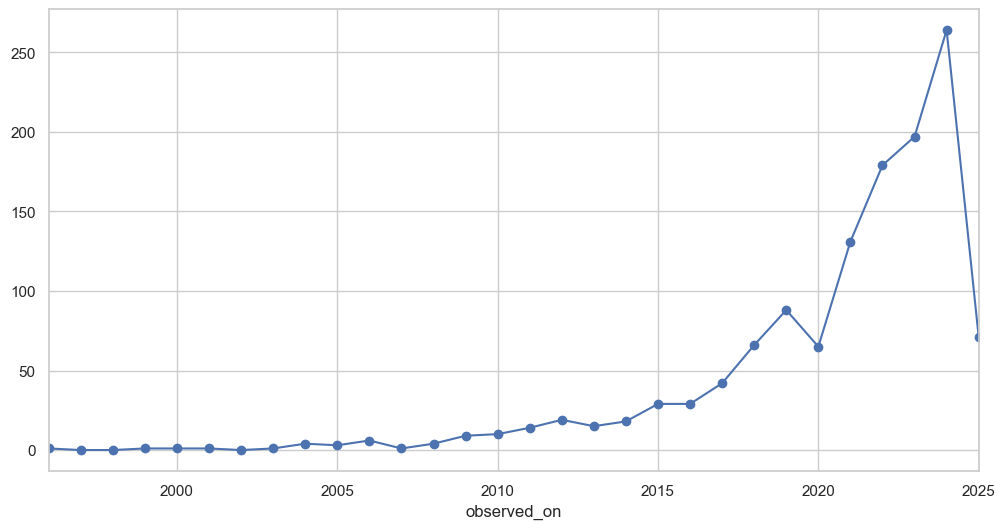

In [28]:
first_observations_per_day.resample('YE').sum().plot(marker='o', figsize=(12, 6))